# Task 7 – Sales Summary from SQLite using Python

**Objective:**  
Use SQL inside Python to pull sales info (total quantity sold, total revenue) from a SQLite database and visualize it with matplotlib.

**Dataset:**  
Using `chinook.db` — sample database containing invoice and invoice_items data.

**Tools:**  
- Python
- sqlite3
- pandas
- matplotlib


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect(r"C:\Users\susan\Downloads\chinook\chinook.db")
print("Connected to database.")


Connected to database.


### Step 1 – Running SQL Query

We’ll use the following tables:
- `invoice_items`: Contains product sales (quantity & unit price)
- `tracks`: Contains product details (track name = product name)

We’ll calculate:
- Total quantity sold
- Total revenue = quantity × unit price

SQL used:
```sql
SELECT t.Name AS product,
       SUM(ii.Quantity) AS total_qty,
       ROUND(SUM(ii.Quantity * ii.UnitPrice), 2) AS revenue
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
GROUP BY t.Name
ORDER BY revenue DESC
LIMIT 10;


In [5]:

# SQL Query to get product-wise total quantity and revenue
query = """
SELECT t.Name AS product,
       SUM(ii.Quantity) AS total_qty,
       ROUND(SUM(ii.Quantity * ii.UnitPrice), 2) AS revenue
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
GROUP BY t.Name
ORDER BY revenue DESC
LIMIT 10;
"""

# Execute SQL and load into DataFrame
df = pd.read_sql_query(query, conn)
print(df)


                        product  total_qty  revenue
0                   The Trooper          5     4.95
1                     Walkabout          2     3.98
2                The Woman King          2     3.98
3                       The Fix          2     3.98
4                         Pilot          2     3.98
5             Phyllis's Wedding          2     3.98
6  How to Stop an Exploding Man          2     3.98
7                      Hot Girl          2     3.98
8                Gay Witch Hunt          2     3.98
9                Branch Closing          2     3.98


### Step 2 – Visualizing Revenue per Product

We'll create a simple bar chart showing the top 10 products by revenue using `matplotlib`.


<Figure size 1200x600 with 0 Axes>

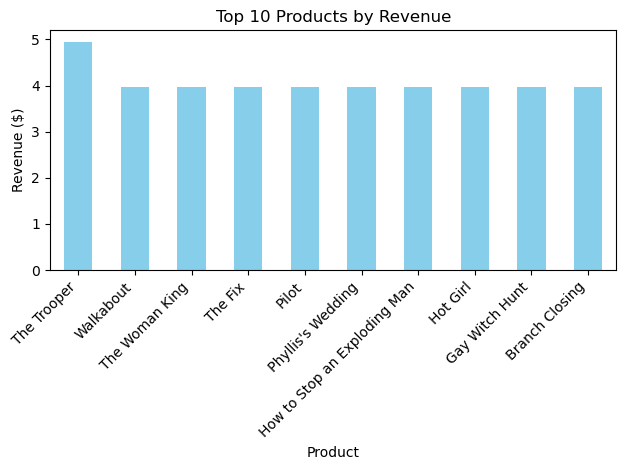

In [6]:
# Plot bar chart
plt.figure(figsize=(12, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


### ✅ Task Complete

- Successfully connected Python to SQLite
- Ran SQL query to fetch sales summary
- Visualized top-selling products using matplotlib

🗂️ Saved chart as: `sales_chart.png`  
📄 Don’t forget to include this chart and notebook in your GitHub submission.
